# Assignment Digital Signal & Image Processing 
Giulia Benvenuto S4678610

## Aliasing
Consider the function $p_T(t)$ with T sampled uniformly in the interval $[1,4]$. Starting from
the train of impulses for two different sampling rates and the corresponding train of impulses in
frequency in the two cases, derive the temporal sampling rate such that the distance between two
consecutive impulses in frequency correspond to a decay of 10% and 1% of the Fourier Transform
$F(ω)$ with respect to the maximum value. 

Comment the type of aliasing you can expect in the
two cases. 

Explain the reason for which with functions like $p_T(t)$ aliasing can be reduced but not
completely eliminated.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5

In [14]:
T = np.random.uniform(1, np.nextafter(4,5))
print("T sampled uniformly: %f"% T)

T sampled uniformly: 2.015232


In [15]:
delta = 0.001
t = np.arange(-6, 6, delta)
print("We consider %d samples"% len(t))

We consider 12000 samples


## Rectangle function $p_T(t)$
I created a function to implement the rectangle function $p_T(t)$ which is defined as:
<center>
    $p_T(t) = 
    \begin{cases}
        1 & \text{if } -T \leq t \leq T\\
        0 & \text{otherwise} 
    \end{cases}$
</center>

In [16]:
def pt(t, T):
  return 1 if abs(t) <= T else 0

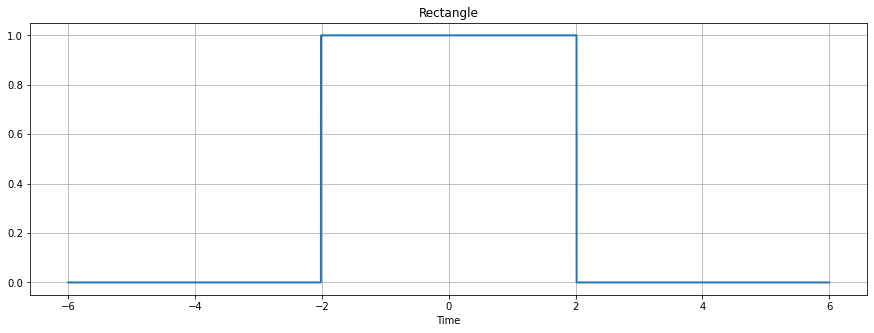

In [17]:
# Plot the rectangle pt(t):
y = np.zeros(len(t))

for i in range(len(t)):
        y[i] = pt(t[i], T)
  
plt.plot(t, y, linewidth=2)
plt.title('Rectangle')
plt.xlabel("Time")
plt.grid(True)
plt.show()

## Fourier Transform of a rectangle
The Fourier Transform of a rectangle function is a $sinc$ function, this is the computation.

In [18]:
# Number of samples:
n = len(t) 

# Array of fft(y):
FT_pt = np.fft.fft(y)

# Array of frequencies values:
freq = np.fft.fftfreq(n, delta)

y_est = np.fft.ifft(FT_pt)

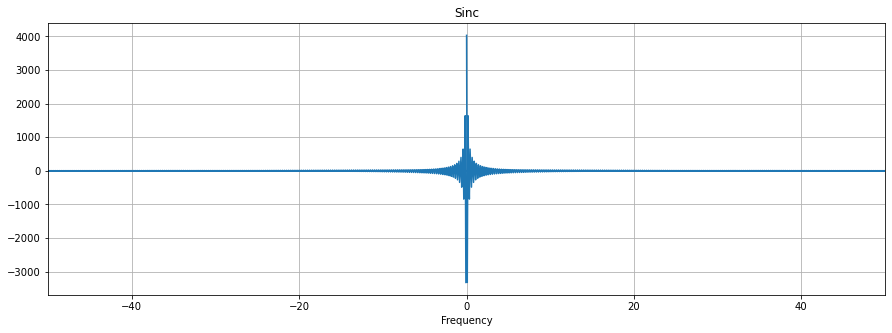

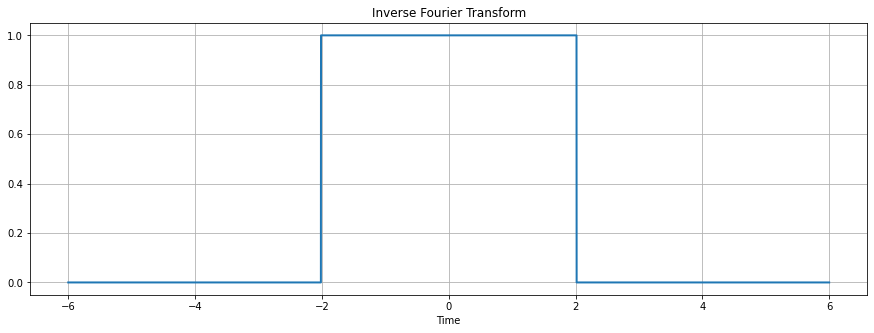

In [19]:
plt.plot(freq, np.real(FT_pt))
plt.xlim(-50, 50)
plt.title("Sinc")
plt.xlabel("Frequency")
plt.grid(True)
plt.show()

plt.plot(t, np.real(y_est), linewidth=2)
plt.title("Inverse Fourier Transform")
plt.xlabel("Time")
plt.grid(True)
plt.show()

## Train of impulses
A train of impulses in the time domain is defined as: $i(t) = \sum_{n=-\infty}^{\infty} \delta(t - n T_s)$.

When we compute the Fourier Transform of it we get again a train of impulses defined as: $I(w) = \omega_s \sum_{n=-\infty}^{\infty} \delta(\omega - k \omega_s)$.

Note that if in time the impulses are $T_s$ far apart, in the frequency they will be $\frac{2 \pi}{T_s}$ far apart.

I implemented two different train of impulses in the time domain in order to show how the sampling of the rectangle changes and how the Fourier Transform of it changes when we change the number of impulses in the train. 

### Train of impulses in the time domain
My first try is a train of impulses with train period = $1000$.

In [20]:
train_period_t = 1000

impulse_train_t1 = np.zeros_like(t)
impulse_train_t1[::int(t.size / train_period_t)] = 1

I implemented the train of impulses as an array full of zeros where I put $1$ every *t.size/train_period*. For example in this case this means that I take an impulse every *t.size/train_period* $= 12000 / 1000 = 12$ samples in time. This means that the sampling interval for the impulses is $T_c =  0.012$.

In [21]:
print("Take an impulse every:" ,int(t.size / train_period_t), "samples in time")
print("How many impulses in the train:" ,np.count_nonzero(impulse_train_t1 == 1))

Take an impulse every: 12 samples in time
How many impulses in the train: 1000


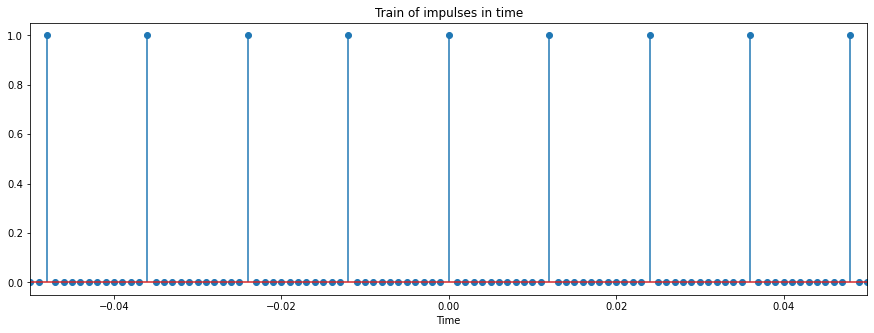

In [22]:
plt.stem(t, impulse_train_t1, linefmt=None, markerfmt=None, basefmt=None)
plt.title('Train of impulses in time')
plt.xlabel("Time")
plt.xlim(-0.05,0.05)
plt.show()

With the plot above we can clearly see that we are taking an impulse every 12 samples in time. 

Over the entire time sampling interval $[-6, +6]$ the train of impulses look like below:

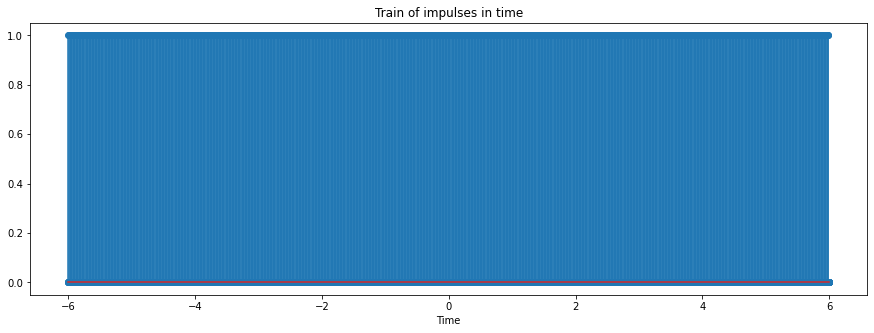

In [23]:
plt.stem(t, impulse_train_t1, linefmt=None, markerfmt=None, basefmt=None)
plt.title('Train of impulses in time')
plt.xlabel("Time")
plt.show()

### Train of impulses in the frequency domain
Knowing that the Fourier Transform of a train of impulses is again a train of impulses, I computed the Fourier Transform of the train of impulses in the time domain getting the one in the frequency domain. Since in the time domain the impulses are really close one to each other I expected the impulses in the frequency domain to be far apart from each other. 

In [24]:
impulse_train_f1 = np.fft.fft(impulse_train_t1)

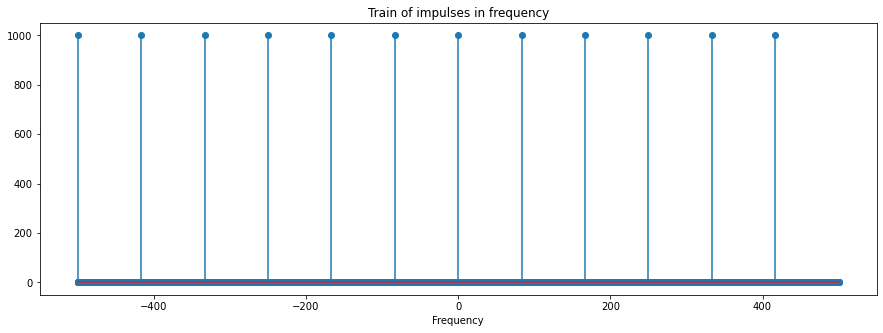

In [25]:
plt.stem(freq, np.real(impulse_train_f1), linefmt=None, markerfmt=None, basefmt=None)
plt.title('Train of impulses in frequency')
plt.xlabel("Frequency")
plt.show()

Precisely their distance is computed as $f_c = 1 / T_c$, thus in this example $f_c = 1 / 0,012 \approx 83,4$.

I checked this by narrowing the frequency range visible in the plot below:

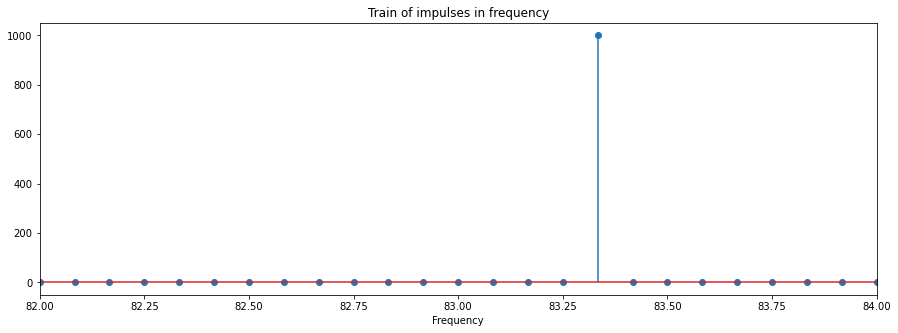

In [26]:
plt.stem(freq, np.real(impulse_train_f1), linefmt=None, markerfmt=None, basefmt=None)
plt.title('Train of impulses in frequency')
plt.xlabel("Frequency")
plt.xlim(82, 84)
plt.show()

### Train of impulses in the time domain
As second try I chose a train period = $200$ so the impulses in time, now, are further apart from each other respect to the previous case.

In [27]:
train_period_t2 = 200

impulse_train_t2 = np.zeros_like(t)
impulse_train_t2[::int(t.size / train_period_t2)] = 1

Since now the train period is $200$ this means that we're taking less impulses in the time domain respect to the previous case. We're taking one impulse every $60$ samples in the time and so our $T_c = 0,06$.

In [28]:
print("Take an impulse every:" ,int(t.size / train_period_t2), "samples in time")
print("How many impulses in the train:" ,np.count_nonzero(impulse_train_t2 == 1))

Take an impulse every: 60 samples in time
How many impulses in the train: 200


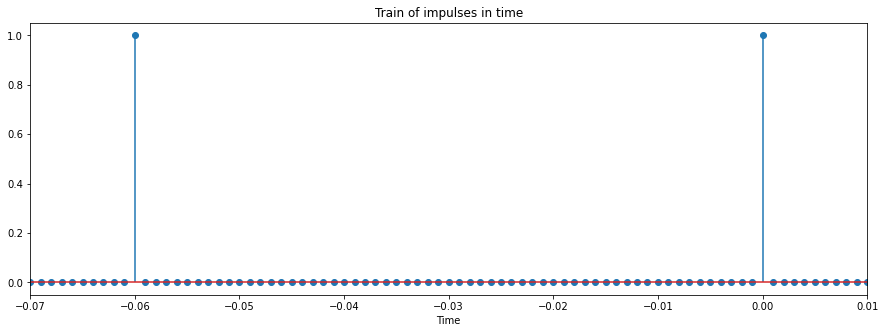

In [29]:
plt.stem(t, impulse_train_t2, linefmt=None, markerfmt=None, basefmt=None)
plt.title('Train of impulses in time')
plt.xlabel("Time")
plt.xlim(-0.07, 0.01)
plt.show()

With the plot above we can clearly see that we are taking an impulse every 60 samples in time. 

Over the entire time sampling interval $[-6, +6]$ the train of impulses look like below:

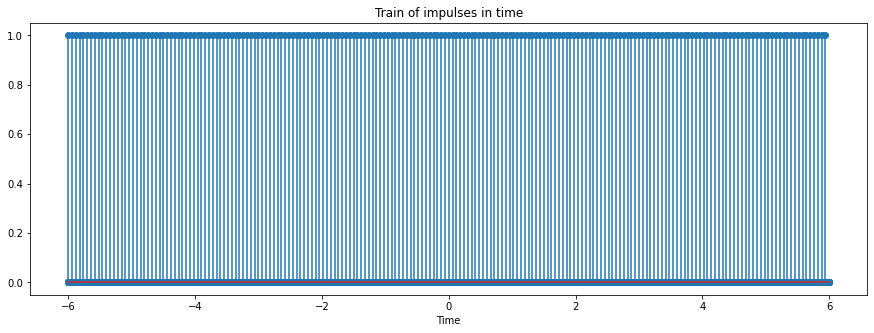

In [30]:
plt.stem(t, impulse_train_t2, linefmt=None, markerfmt=None, basefmt=None)
plt.title('Train of impulses in time')
plt.xlabel("Time")
plt.show()

### Train of impulses in the frequency domain
I computed again the Fourier Transform of the train of impulses in the time domain getting the one in the frequency domain.
Since in the time domain, in this case, the impulses are not so close as before, in the frequency domain the impulses are closer than in the previous case.


In [31]:
impulse_train_f2 = np.fft.fft(impulse_train_t2)

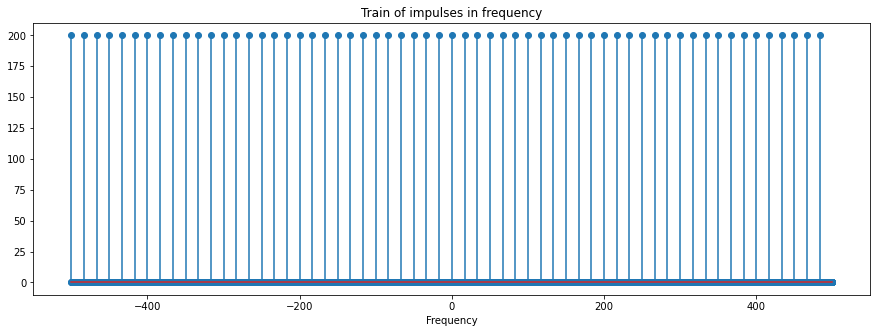

In [32]:
plt.stem(freq, np.real(impulse_train_f2), linefmt=None, markerfmt=None, basefmt=None)
plt.title('Train of impulses in frequency')
plt.xlabel("Frequency")
plt.show()

Precisely their distance is computed as $f_c = 1 / T_c$, thus in this example $f_c = 1 / 0,06 \approx 16,7$.

I checked this by narrowing the frequency range visible in the plot below:

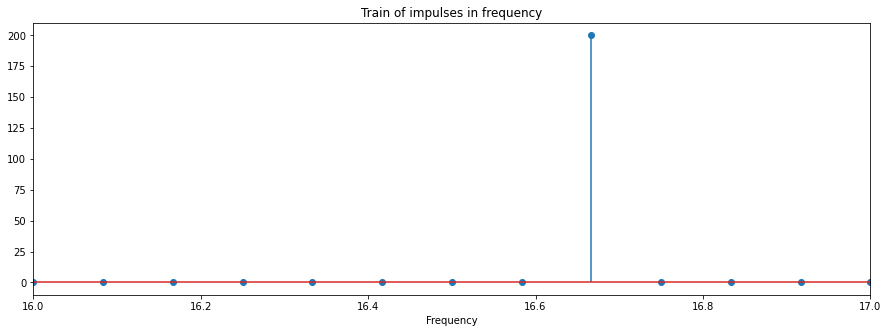

In [33]:
plt.stem(freq, np.real(impulse_train_f2), linefmt=None, markerfmt=None, basefmt=None)
plt.title('Train of impulses in frequency')
plt.xlabel("Frequency")
plt.xlim(16, 17)
plt.show()

## Sampling the Rectangle $p_T(t)$
I sampled the rectangle function $p_T(t)$ by multiplying it with the train of impulses that I defined. 
<center>
    $s_{smp}(t) = i(t) \cdot p_T(t)$
</center>
where:

- $s_{smp}(t)$ is the sampled rectangle.
- $i(t)$ is the train of impulses.
- $p_T(t)$ is the rectangle function.

### Sample with train_impulses_t1 - train_period = 1000

In [34]:
smp1 = np.zeros(len(t))
smp1 = y * impulse_train_t1

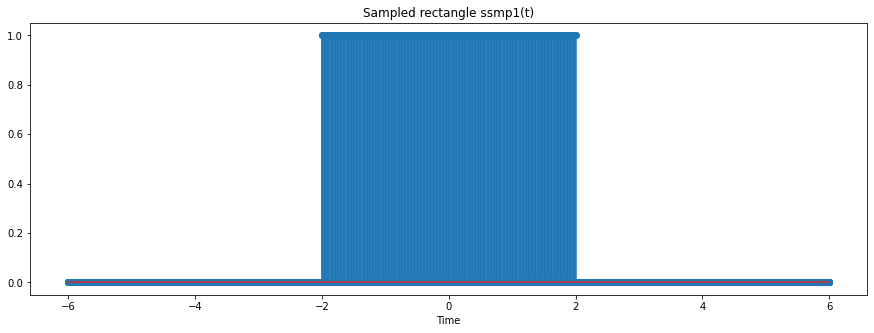

In [35]:
plt.stem(t, smp1)
plt.title('Sampled rectangle ssmp1(t)')
plt.xlabel("Time")
plt.show()

### Sample with train_impulses_t2 - train_period = 200

In [36]:
smp2 = np.zeros(len(t))
smp2 = y * impulse_train_t2

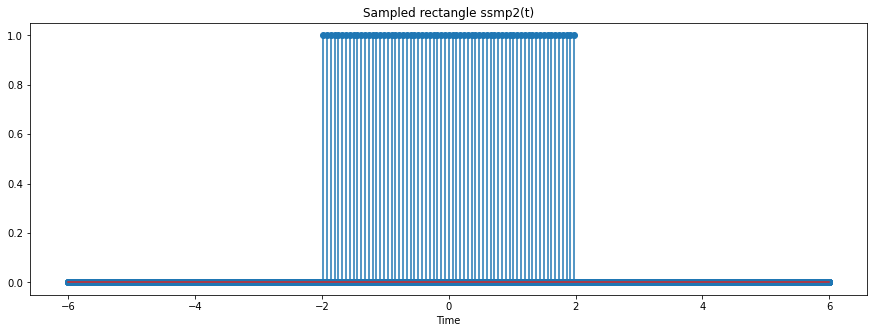

In [37]:
plt.stem(t, smp2)
plt.title('Sampled rectangle ssmp2(t)')
plt.xlabel("Time")
plt.show()

## Fourier Transform of the sampled signals $s_{smp1}(t)$
- I computed the Fourier Transform of the sampled signals $smp1(t)$ in order to get $S_{smp1}(w)$.
- This signal is the sum of equidistant copies of $S(w)$ (Fourier Transform of the rectangle - sinc), each one of them centered in $f_c = 1 / T_c$.

In [38]:
FT_smp1 = np.fft.fft(smp1)

If I plot the entire Fourier Transform of the sampled rectangle I get a line that cross the image since the first element and the last one are connected. To avoid this problem I decided a range of frequencies to be visualized and I computed the indices of the Fourier Transform correspondent to that. 

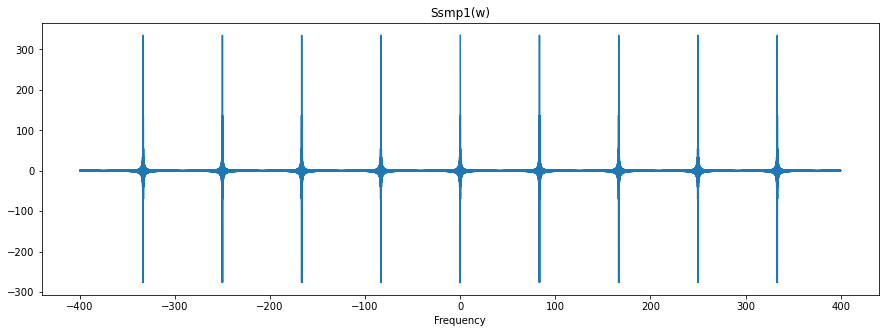

In [39]:
low_freq = -400
high_freq = 400

# Find the indices of the FFT result that correspond to the desired frequency range
idx = np.where((freq >= low_freq) & (freq <= high_freq))

# Slice the FFT result and the frequency array to only include the values in the desired range
FT_smp1_range = FT_smp1[idx]
freq_range = freq[idx]

# Plot the FFT result in the desired frequency range
plt.plot(freq_range, np.real(FT_smp1_range))
plt.title("Ssmp1(w)")
plt.xlabel("Frequency")
plt.show()

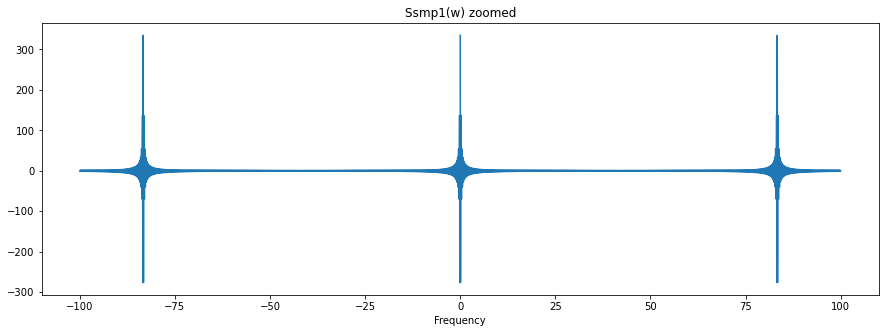

In [40]:
low_freq = -100
high_freq = 100

# Find the indices of the FFT result that correspond to the desired frequency range
idx = np.where((freq >= low_freq) & (freq <= high_freq))

# Slice the FFT result and the frequency array to only include the values in the desired range
FT_smp1_range = FT_smp1[idx]
freq_range = freq[idx]

# Plot the FFT result in the desired frequency range
plt.plot(freq_range, np.real(FT_smp1_range))
plt.title("Ssmp1(w) zoomed")
plt.xlabel("Frequency")
plt.show()

### Observations about aliasing: 
With the train period = $1000$ we are sampling the rectangle function very finely, this has the consequence that the sinc replicas of the transformed sampled signal will be very distant from each other, precisely they will be positioned in $f_c \approx 83,4$, their lobes will overlap where they are almost equal to zero, therefore aliasing, in this case, is negligible.

### Why with functions like  $p_𝑇(𝑡)$ aliasing can be reduced but not completely eliminated?
Although aliasing is almost non-existent (about $1\%$ of overlapping between adiacent replicas), it cannot be completely avoided this is because the rectangle function $p_T(t)$ has a limited support in the time domain. It is different from zero only between $-T$ and $+T$, this implies that in the frequency domain it will be non bandwidth limited and so we will always have aliasing. The only way to reduce it as much as possible, in fact, is to have replicas as distant as possible.

## Fourier Transform of the sampled signals $s_{smp2}(t)$
- I computed the Fourier Transform of the sampled signals $smp2(t)$ in order to get $S_{smp2}(w)$.
- This signal is the sum of equidistant copies of $S(w)$ (Fourier Transform of the rectangle - sinc), each one of them centered in $f_c = 1 / T_c$.
- Since the period train is smaller than the previous case we have closer replicas of sinc in the frequencies.

In [41]:
FT_smp2 = np.fft.fft(smp2)

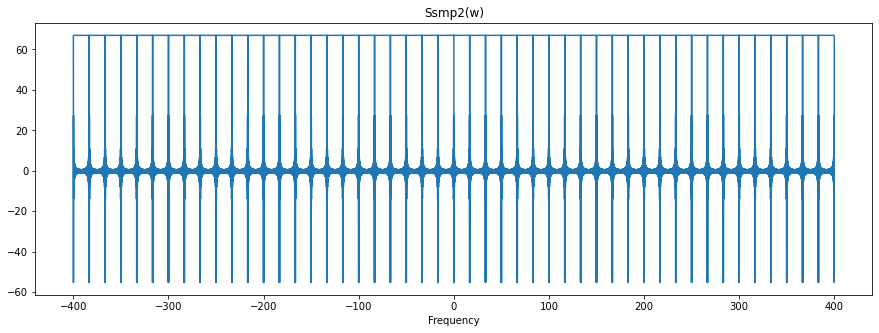

In [42]:
low_freq = -400
high_freq = 400

# Find the indices of the FFT result that correspond to the desired frequency range
idx = np.where((freq >= low_freq) & (freq <= high_freq))

# Slice the FFT result and the frequency array to only include the values in the desired range
FT_smp2_range = FT_smp2[idx]
freq_range = freq[idx]

# Plot the FFT result in the desired frequency range
plt.plot(freq_range, np.real(FT_smp2_range))
plt.title("Ssmp2(w)")
plt.xlabel("Frequency")
plt.show()

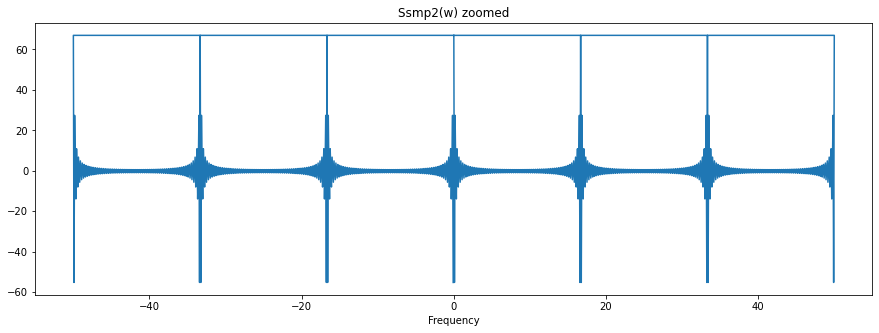

In [43]:
low_freq = -50
high_freq = 50

# Find the indices of the FFT result that correspond to the desired frequency range
idx = np.where((freq >= low_freq) & (freq <= high_freq))

# Slice the FFT result and the frequency array to only include the values in the desired range
FT_smp2_range = FT_smp2[idx]
freq_range = freq[idx]

# Plot the FFT result in the desired frequency range
plt.plot(freq_range, np.real(FT_smp2_range))
plt.title("Ssmp2(w) zoomed")
plt.xlabel("Frequency")
plt.show()

### Observations about aliasing: 
With the train period = $200$ we are sampling the rectangle function less finely respect to the previous case, this has the consequence that the sinc replicas of the transformed sampled signal will be closer on to each other, precisely they will be positioned in $f_c \approx 16,7$, their lobes will overlap, where they have no negligible values, creating *aliasing*. Aliasing produces an information loss that is not reversible and leads to errors in signal analysis and processing. 